In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('HRDataset.csv')

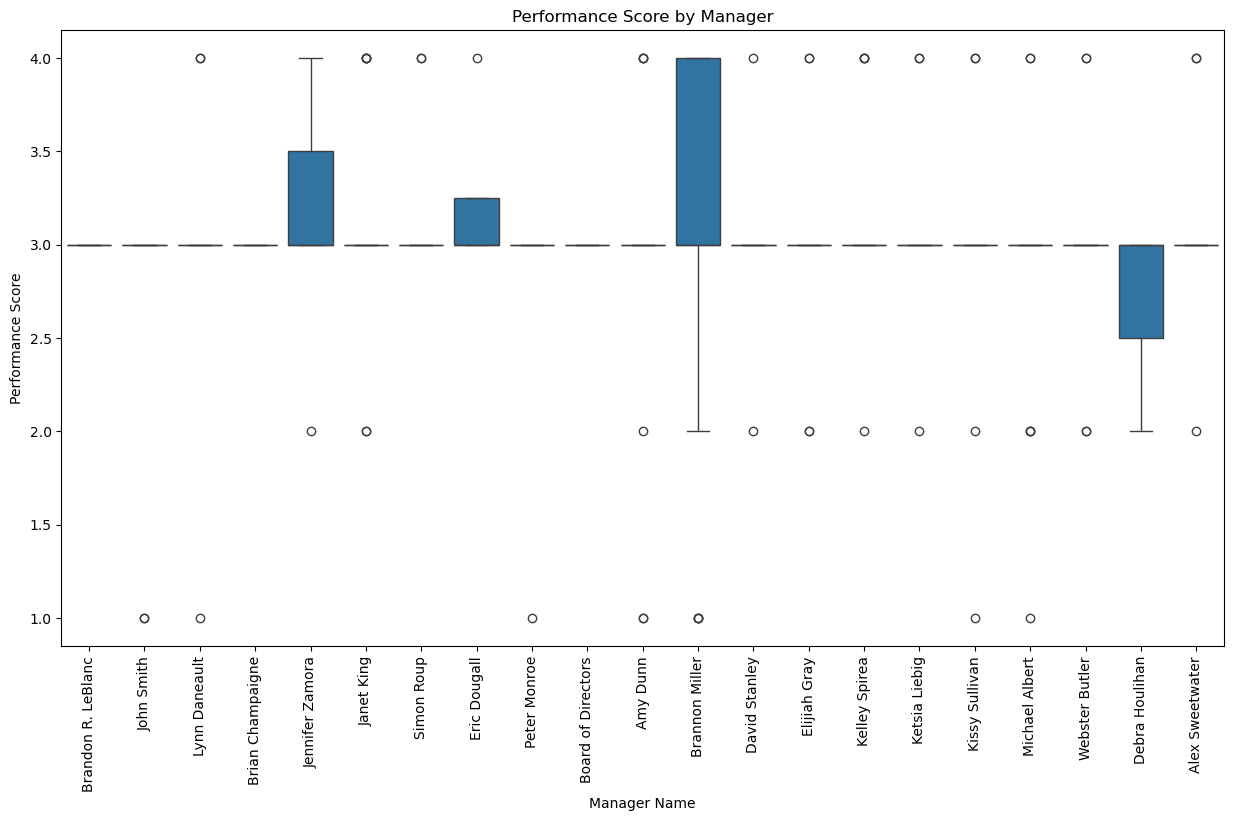

In [8]:
df_clean = df.dropna(subset=['ManagerName', 'PerformanceScore'])

plt.figure(figsize=(15, 8))
sns.boxplot(x='ManagerName', y='PerfScoreID', data=df_clean)
plt.title('Performance Score by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Performance Score')
plt.xticks(rotation=90)
plt.show()


Zadanie 2 Źródła rekrutacyjne

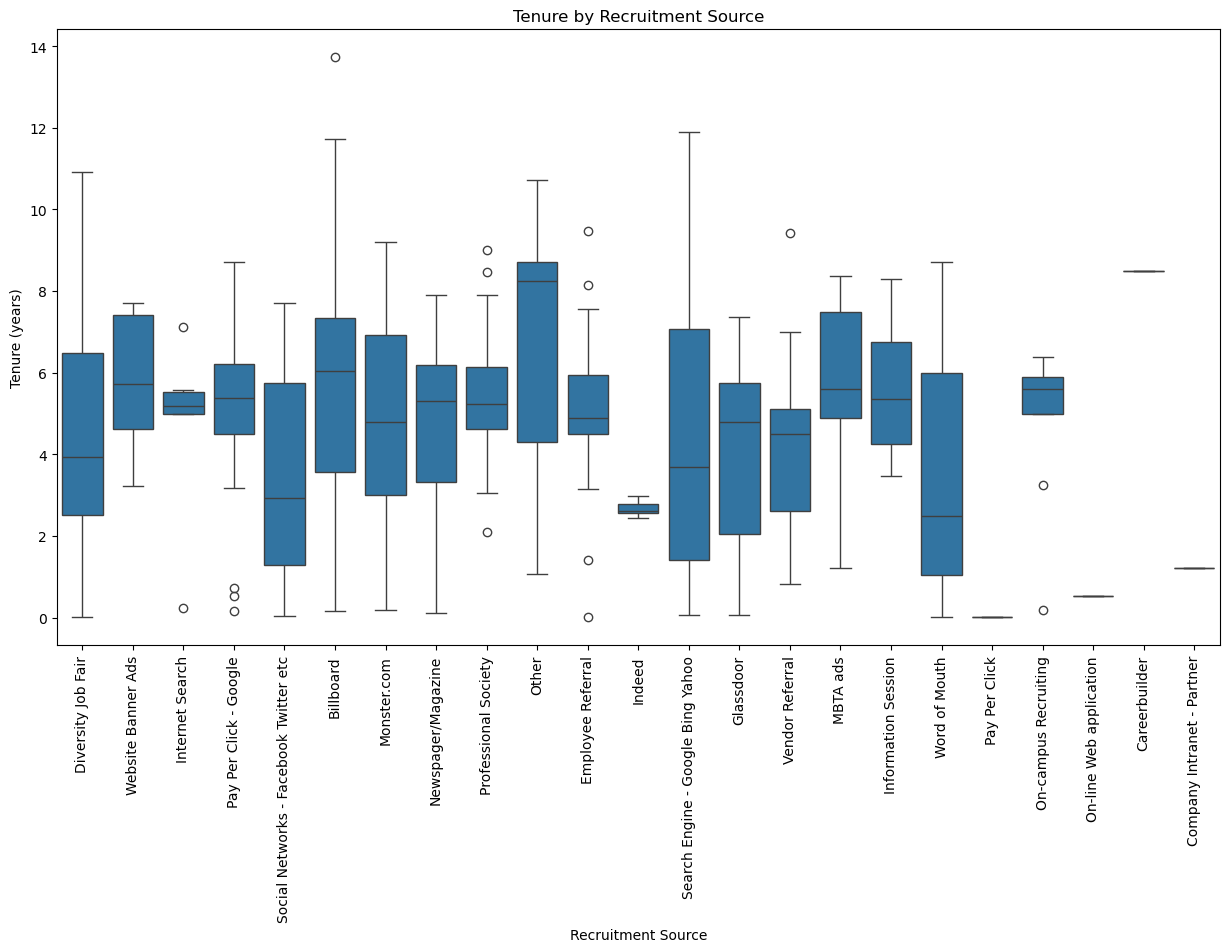

In [10]:
# Zmiana foramtu daty
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], format='%m/%d/%Y')


# Użycie daty obecnej dla pracowników, którzy nadal pracują
df['EndDate'] = df['DateofTermination'].fillna(pd.to_datetime('2019-09-27'))
#Staż pracy
df['Tenure'] = (df['EndDate'] - df['DateofHire']) / pd.Timedelta(days=365)


plt.figure(figsize=(15, 8))
sns.boxplot(x='RecruitmentSource', y='Tenure', data=df)
plt.title('Tenure by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Tenure (years)')
plt.xticks(rotation=90)
plt.show()


Zadanie 3. Struktura stanu cywilnego

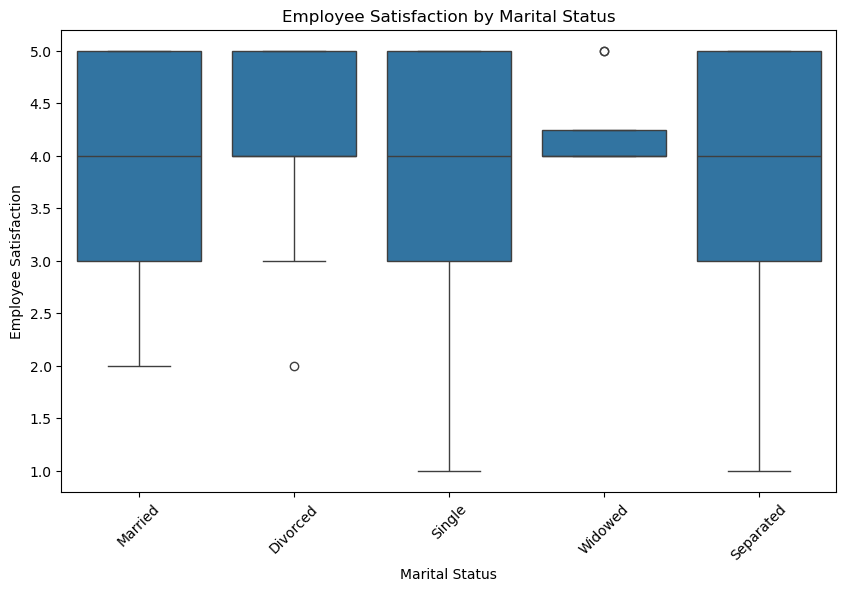

In [11]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='MaritalDesc', y='EmpSatisfaction', data=df)
plt.title('Employee Satisfaction by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Employee Satisfaction')
plt.xticks(rotation=45)
plt.show()


Zadanie 4. Struktura wieku

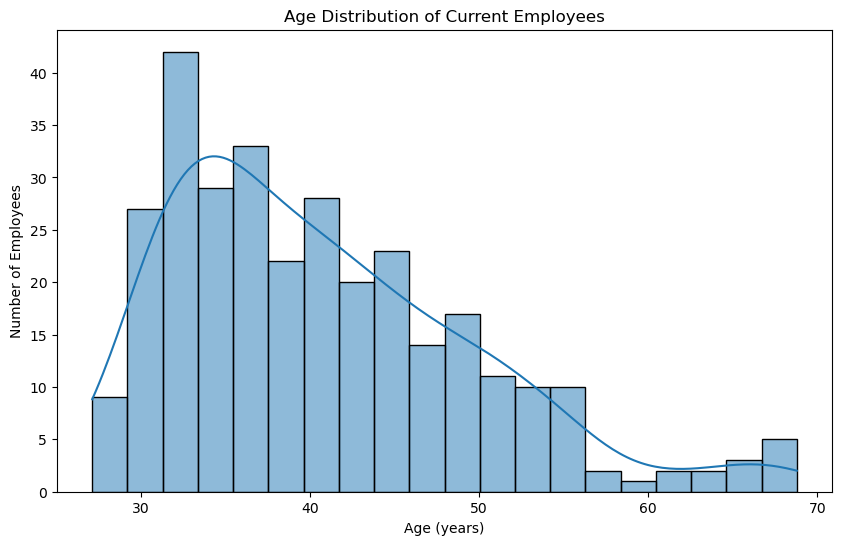

In [25]:
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y', errors='coerce')
df.loc[df['DOB'].dt.year > pd.to_datetime('today').year, 'DOB'] -= pd.DateOffset(years=100)
df['Age'] = (pd.to_datetime('2019-09-27') - df['DOB']) / pd.Timedelta(days=365)

df = df.dropna(subset=['Age'])

# Wykres histogramu pokazujący rozkład wieku pracowników
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Current Employees')
plt.xlabel('Age (years)')
plt.ylabel('Number of Employees')
plt.show()



Zadanie 5. Wiek a specjalne projekty

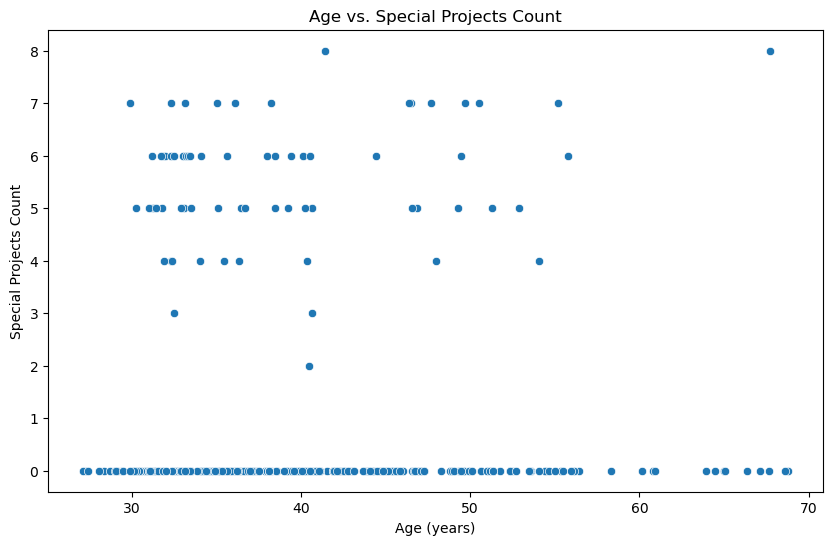

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='SpecialProjectsCount', data=df)
plt.title('Age vs. Special Projects Count')
plt.xlabel('Age (years)')
plt.ylabel('Special Projects Count')
plt.show()

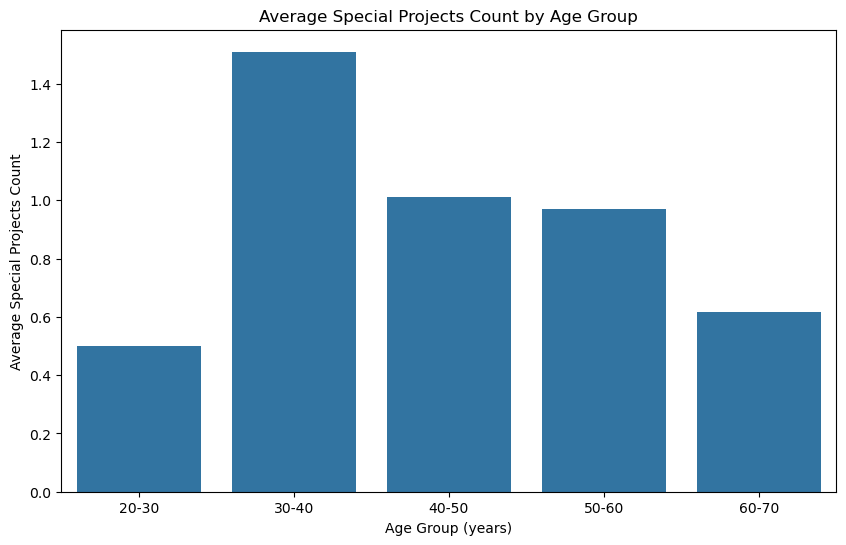

In [33]:
# Stworzenie grup wiekowych
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

# Obliczenie średniej liczby specjalnych projektów dla każdej grupy wiekowej
average_projects = df.groupby('AgeGroup', observed=True)['SpecialProjectsCount'].mean().reset_index()

# Wykres słupkowy pokazujący średnią liczbę specjalnych projektów na pracownika w każdej grupie wiekowej
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='SpecialProjectsCount', data=average_projects)
plt.title('Average Special Projects Count by Age Group')
plt.xlabel('Age Group (years)')
plt.ylabel('Average Special Projects Count')
plt.show()
